## FCB 7.4.

### (b)

In [2]:
import numpy as np
import scipy
import scipy.stats as st
from random import random
import inspect

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
np.random.seed(123)

Sigma = st.gamma.rvs(a = 10, scale = 1/2.5, size = 5000)
n = 5000

Theta = [0]*n
for i in range(n):
    Theta[i] = st.norm.rvs(loc = 4.1, scale = np.sqrt((1/Sigma[i])/20))

Y = [0]*n
for i in range(n):
    Y[i] = 0.31 * st.norm.rvs(loc = Theta[i], scale = np.sqrt(1/Sigma[i]))+0.46 * st.norm.rvs(loc = 2*Theta[i], scale = 2 * np.sqrt(1/Sigma[i]))+0.23 * st.norm.rvs(loc = 3*Theta[i], scale = 3 * np.sqrt(1/Sigma[i]))

Text(0, 0.5, 'count')

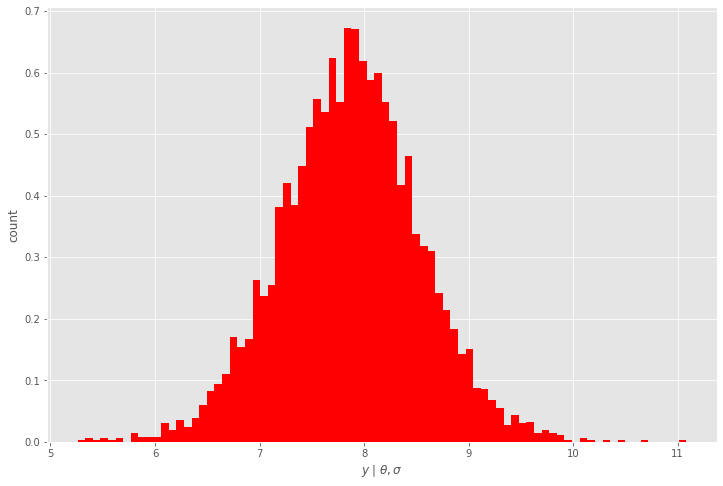

In [20]:
plt.figure(figsize = (12, 8))
plt.style.use('ggplot')
plt.hist(Y, bins=80, color = 'red', density = True)
plt.xlabel(r'$y \mid \theta, \sigma$' )
plt.ylabel('count')

### (b)

In [21]:
CI_q = (np.quantile(Y, 0.125), np.quantile(Y, 0.875))
CI_q

(7.128623272748419, 8.61492772981564)

### (c)

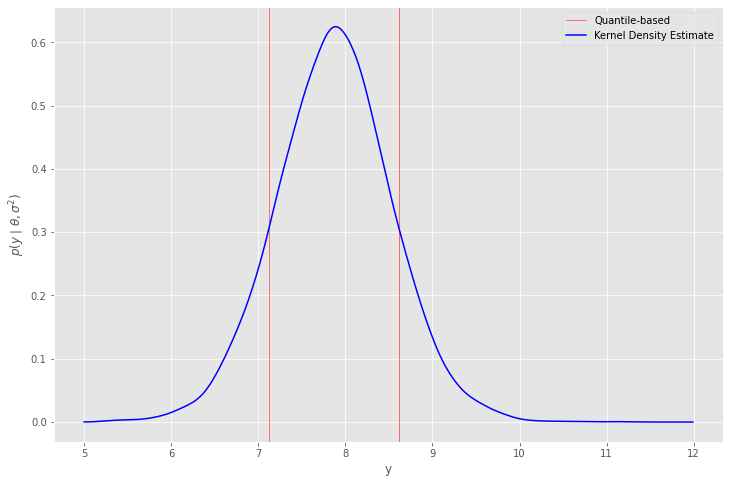

In [22]:
y = np.arange(5, 12, 0.01)
kde = st.gaussian_kde(Y, bw_method='silverman')
pdf_kde = kde(y)

plt.figure(figsize=(12, 8))
plt.axvline(x=CI_q[0], color='r', linewidth=0.5, label = "Quantile-based")
plt.axvline(x=CI_q[1], color='r', linewidth=0.5)
plt.plot(y, pdf_kde, color='blue', label='Kernel Density Estimate')
plt.xlabel('y')
plt.ylabel(r'$p(y \mid\theta, \sigma^2$)')
plt.legend()
plt.show()

In [33]:
pdf_sorted = sorted(pdf_kde, reverse = True)
for i in range(len(pdf_sorted)):
    if 0.01*sum(pdf_sorted[:i])>=0.75:
        print(i)
        break

153


In [43]:
CI_H = (y[np.where(pdf_kde==pdf_sorted[151])], y[np.where(pdf_kde == pdf_sorted[152])])
CI_H

(array([7.11]), array([8.63]))

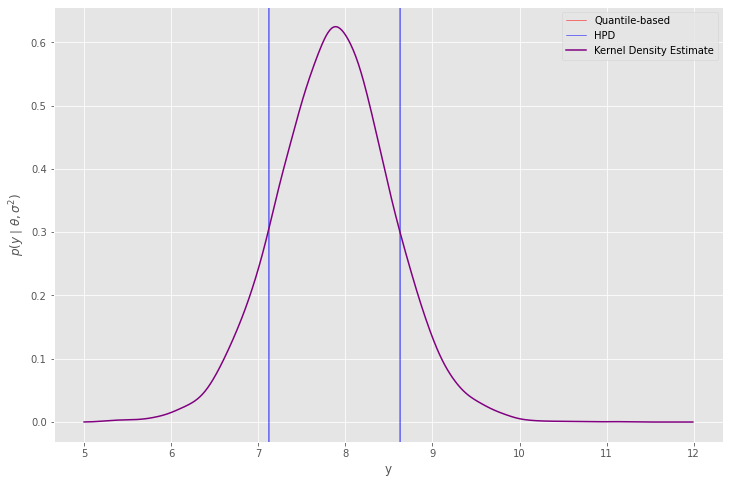

In [45]:
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')
plt.axvline(x=CI_q[0], color='r', linewidth=0.5, label = "Quantile-based")
plt.axvline(x=CI_q[1], color='r', linewidth=0.5)
plt.axvline(x=CI_H[0], color='b', linewidth=0.5, label = "HPD")
plt.axvline(x=CI_H[1], color='b', linewidth=0.5)
plt.plot(y, pdf_kde, color='purple', label='Kernel Density Estimate')
plt.xlabel('y')
plt.ylabel(r'$p(y \mid\theta, \sigma^2$)')
plt.legend()
plt.show()

Very little difference in quatile based and cumulative method based.

### (d)
I think so.

## 2.

In [46]:
# (a)
import numpy as np
import pandas as pd
from random import seed
from random import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
P = np.array([[0.5, 0.5, 0, 0, 0, 0],
              [0.1, 0.5, 0.4, 0, 0, 0],
              [0, 0.2, 0.5, 0.3, 0, 0],
              [0, 0, 0.3, 0.5, 0.2, 0],
              [0, 0, 0, 0.4, 0.5, 0.1],
              [0, 0, 0, 0, 0.5, 0.5]])

In [51]:
# (b)
Plim=P
for i in range (10):
    Plim=Plim.dot(P)
    
print("n=10")
print(Plim)
for i in range (50):
    Plim=Plim.dot(P)
    
print("n=50")
print(Plim)
for i in range (100):
    Plim=Plim.dot(P)
    
print("n=100")
print(Plim)

n=10
[[0.04581862 0.19763594 0.33704986 0.28341519 0.11713152 0.01894886]
 [0.03952719 0.18063857 0.32815787 0.29593513 0.13231494 0.0234263 ]
 [0.03370499 0.16407894 0.31832745 0.30757955 0.14796756 0.02834152]
 [0.02834152 0.14796756 0.30757955 0.31832745 0.16407894 0.03370499]
 [0.0234263  0.13231494 0.29593513 0.32815787 0.18063857 0.03952719]
 [0.01894886 0.11713152 0.28341519 0.33704986 0.19763594 0.04581862]]
n=50
[[0.03125019 0.15625057 0.31250038 0.31249962 0.15624943 0.03124981]
 [0.03125011 0.15625034 0.31250023 0.31249977 0.15624966 0.03124989]
 [0.03125004 0.15625011 0.31250008 0.31249992 0.15624989 0.03124996]
 [0.03124996 0.15624989 0.31249992 0.31250008 0.15625011 0.03125004]
 [0.03124989 0.15624966 0.31249977 0.31250023 0.15625034 0.03125011]
 [0.03124981 0.15624943 0.31249962 0.31250038 0.15625057 0.03125019]]
n=100
[[0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]
 

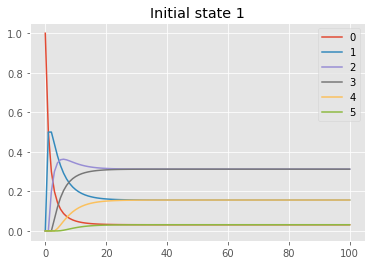

In [63]:
state=np.array([[1, 0, 0, 0, 0, 0]])
stateHist=state

for x in range(100):
    state = state.dot(P)
    stateHist = np.append(stateHist, state, axis=0)
    
dfDistrHist = pd.DataFrame(stateHist)

dfDistrHist.plot()
plt.title("Initial state 1")
plt.show()

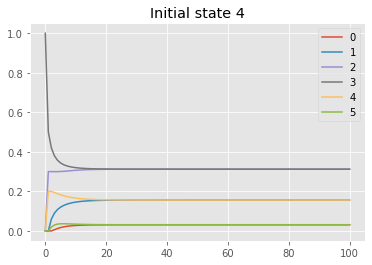

In [69]:
state=np.array([[0, 0, 0, 1, 0, 0]])
stateHist=state

for x in range(100):
    state = state.dot(P)
    stateHist = np.append(stateHist, state, axis=0)
    
dfDistrHist = pd.DataFrame(stateHist)

dfDistrHist.plot()
plt.title("Initial state 4")
plt.show()

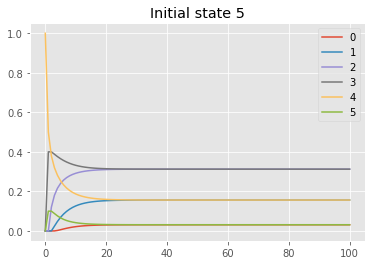

In [68]:
state=np.array([[0, 0, 0, 0, 1, 0]])
stateHist=state

for x in range(100):
    state = state.dot(P)
    stateHist = np.append(stateHist, state, axis=0)
    
dfDistrHist = pd.DataFrame(stateHist)

dfDistrHist.plot()
plt.title("Initial state 5")
plt.show()

{0: 1632, 1: 7964, 2: 15564, 3: 15426, 4: 7901, 5: 1514}


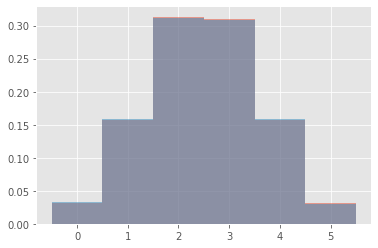

In [66]:
np.random.seed(1)
chain=0
chainHist=chain
for i in range(50000):
    pb=P[chain]
    pb=np.array(pb).flatten()
    chain=np.random.choice(6,1,p=pb)
    chainHist=np.append(chainHist,chain)

count={}
for i in chainHist:
    try: count[i] += 1
    except: count[i]=1
print(count)
plt.figure()
bi=np.random.binomial(5, 0.5, 50000)
plt.hist(bi,bins=np.linspace(-0.5,5.5,7), alpha=0.5, density=True)
plt.hist(chainHist, bins=np.linspace(-0.5,5.5,7),alpha=0.5, density=True)
plt.show()

<IPython.core.display.Javascript object>


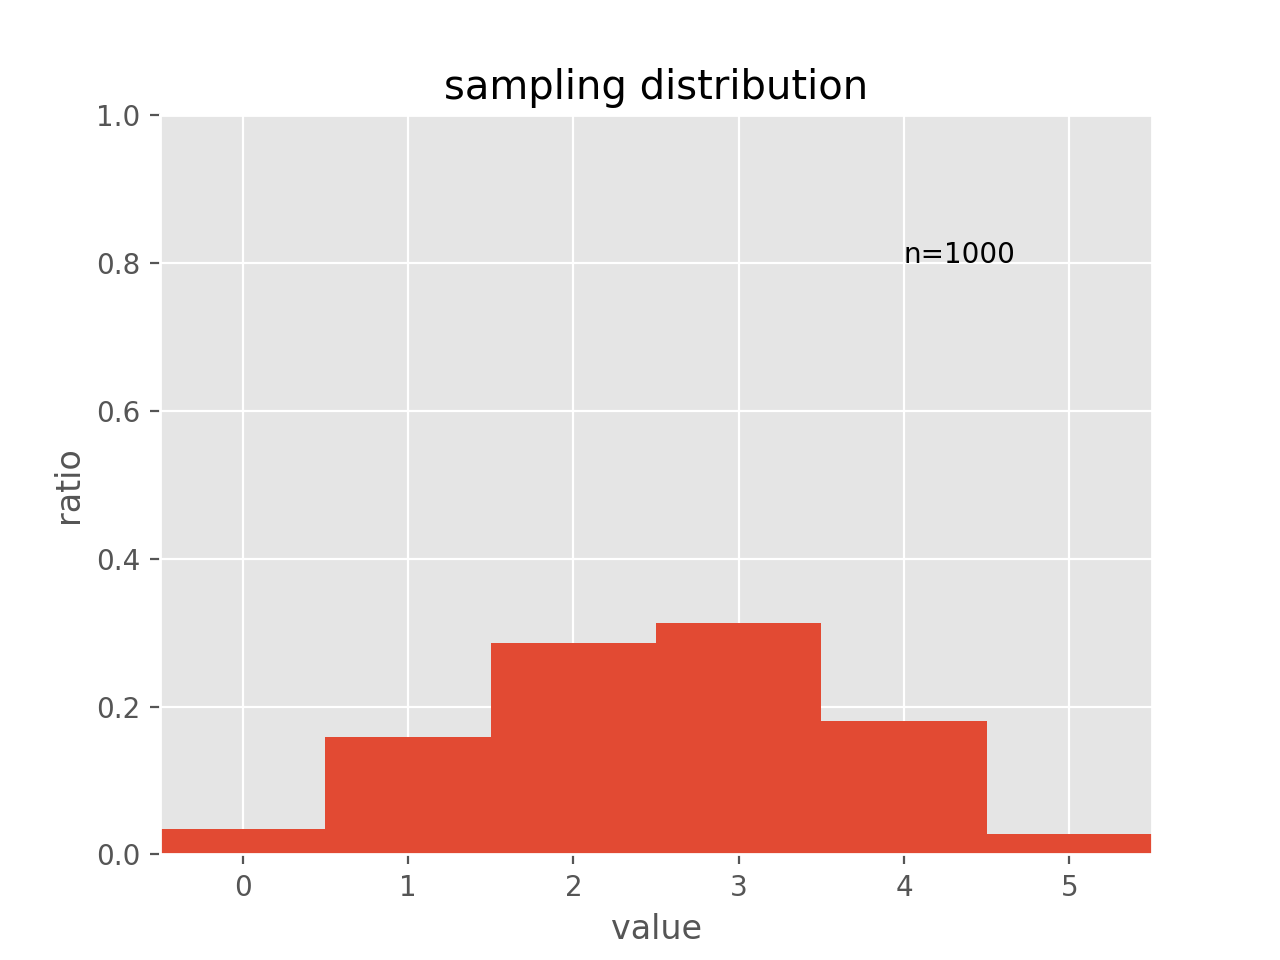

In [70]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt

def update(curr):
    if curr == 1000:
        a.event_source.stop()
    plt.cla()
    plt.hist(chainHist[:curr], bins=np.linspace(-0.5,5.5,7), density=True)
    plt.axis([-0.5,5.5, 0, 1])
    plt.gca().set_title('sampling distribution')
    plt.gca().set_ylabel('ratio')
    plt.gca().set_xlabel('value')
    plt.gca().annotate('n={}'.format(curr), [4,0.8])


fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval = 0.1)

plt.show()